# Web Mining and Applied NLP (CSIS 44-620)

## P6: Web Scraping, NLP (Requests, BeautifulSoup, and spaCy) & Engage

### 
Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/web-scraping <br>
6 July 2025 <br>

### Introduction
In this project, I explore the fundamentals of web scraping and natural language processing (NLP) using Python within a Jupyter Notebook environment. The primary objective is to extract textual data from web sources and perform basic NLP tasks to analyze and interpret that data. This includes using libraries such as `requests` to fetch web content, `BeautifulSoup` to parse HTML, and `spaCy` with `spacytextblob` to process and analyze text for sentiment, subjectivity, and linguistic patterns. <br>

Web scraping is an essential skill in data analytics and business intelligence, enabling analysts to gather real-time or hard-to-find data from public web pages. NLP extends this capability by allowing us to interpret the collected text, uncover hidden insights, and support data-driven decision-making. Together, these skills allow for scalable and automated information extraction that can inform strategy, research, and communication analysis. <br>

This project also demonstrates effective use of Python virtual environments, version control with GitHub, and professional documentation practices. All code has been executed prior to submission, and final versions have been exported to HTML to ensure accessibility and review readiness. The final submission includes code, outputs, visualizations, and reflections on the process. <br>

### Imports
Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

`beautifulsoup4` is a Python library used for parsing HTML and XML documents. It provides Pythonic methods for navigating, searching, and modifying the parse tree, making it ideal for web scraping tasks. BeautifulSoup is particularly useful for extracting data from web pages with inconsistent or poorly structured HTML. It works well with parsers like `html5lib` and `lxml`. <br>
https://www.crummy.com/software/BeautifulSoup/bs4/doc/ <br>

`html5lib` is a pure-Python HTML parser designed to parse documents the same way modern web browsers do. It is especially useful for handling malformed or messy HTML. When used with `beautifulsoup4`, it provides robust parsing capabilities that help ensure accurate and tolerant extraction of web content. <br>
https://html5lib.readthedocs.io/en/latest/ <br>

`ipykernel` allows Jupyter Notebooks to run Python code by providing the kernel interface used to execute cells and handle communication between the front-end and the Python interpreter. <br>
https://ipykernel.readthedocs.io/en/latest/ <br>

`jupyterlab` is the next-generation user interface for Project Jupyter. It offers a flexible, extensible environment for interactive computing with support for code, markdown, visualizations, and terminals all within a tabbed workspace. JupyterLab enhances productivity by allowing users to organize notebooks, text editors, and data file viewers side by side. <br>
https://jupyterlab.readthedocs.io/en/stable/ <br>

`Matplotlib` is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

`notebook` is the Python package that powers the classic Jupyter Notebook interface. It provides a web-based environment for writing and running code in interactive cells, supporting rich media, visualizations, and markdown documentation. The notebook server manages the execution of kernels and renders notebooks in a browser. This tool is foundational for data analysis, teaching, and exploratory programming workflows. <br>
https://jupyter-notebook.readthedocs.io/en/stable/ <br>

`Pandas` is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

The `requests` library simplifies making HTTP requests in Python, allowing you to send GET, POST, and other types of requests to interact with APIs or web services. <br>
 https://docs.python-requests.org/en/latest/ <br>

`spaCy` is an advanced NLP library for Python that provides tools for tokenization, part-of-speech tagging, named entity recognition, and more, using pre-trained pipelines. <br>
https://spacy.io/ <br>

`spacytextblob` is a plugin for spaCy that adds sentiment analysis capabilities by integrating TextBlob's polarity and subjectivity scores into spaCy’s pipeline. <br>
https://github.com/AndrewIbrahim/spacy-textblob <br>

`TextBlob` is a Python library for processing textual data, built on top of `nltk` and `pattern`. It provides a simple API for common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, translation, and sentiment analysis. Its intuitive design and built-in sentiment scoring functions make it especially useful for quick prototyping and educational applications. <br>
https://textblob.readthedocs.io/en/dev/ <br>

In [26]:
import os
import requests
import pickle
import re
from bs4 import BeautifulSoup
from collections import Counter
from typing import List
import spacy
import matplotlib.pyplot as plt
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")

### Tasks
Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository. <br>

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question. <br>

#### Section 1. Extract and Save Article HTML
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file) <br>

In [25]:
# Define URL and local path
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
dump_folder = "C:/Projects/web-scraping/dump"
os.makedirs(dump_folder, exist_ok=True)

# Get HTML content from the URL
response = requests.get(url)
html_content = response.text

# Define path to save .pkl file
pkl_path = os.path.join(dump_folder, "article_html.pkl")

# Dump HTML to .pkl file
with open(pkl_path, "wb") as file:
    pickle.dump(html_content, file)

print(f"HTML content successfully saved to {pkl_path}")

HTML content successfully saved to C:/Projects/web-scraping/dump\article_html.pkl


#### Section 2. Load and Display Article Text
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`) <br>

In [15]:
# Paths
pkl_path = "C:/Projects/web-scraping/dump/article_html.pkl"
parse_folder = "C:/Projects/web-scraping/parse"
os.makedirs(parse_folder, exist_ok=True)
txt_path = os.path.join(parse_folder, "article_text.txt")

# Load HTML content
with open(pkl_path, "rb") as file:
    html_content = pickle.load(file)

# Parse and extract text
soup = BeautifulSoup(html_content, "html.parser")
raw_text = soup.get_text()

# Normalize whitespace to a single space
cleaned_text = re.sub(r'\s+', ' ', raw_text).strip()

# Save cleaned text to .txt
with open(txt_path, "w", encoding="utf-8") as file:
    file.write(cleaned_text)

# Print first 1500 characters
print(cleaned_text[:1500])

How Laser Headlights Work | Hackaday Skip to content Hackaday Primary Menu Home Blog Hackaday.io Tindie Hackaday Prize Submit About Search for: March 27, 2021 How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out. Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers! Laser Headlights?! BWM’s prototype laser headlight assemblies undergoing testing. The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the f

#### Section 3. Analyze Most Frequent Tokens with spaCy
Load the article text into a trained `spaCy` pipeline, and determine the 10 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace). <br>

In [21]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article text
txt_path = "C:/Projects/web-scraping/parse/article_text.txt"
with open(txt_path, "r", encoding="utf-8") as file:
    article_text = file.read()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: no punctuation, no stop words, no whitespace
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)
most_common_tokens = token_freq.most_common(10)

# Print results
print("Top 10 Most Frequent Tokens (excluding stopwords, punctuation, and whitespace):\n")
for token, freq in most_common_tokens:
    print(f"Token: '{token}' | Frequency: {freq}")

Top 10 Most Frequent Tokens (excluding stopwords, punctuation, and whitespace):

Token: 'comment' | Frequency: 136
Token: 'march' | Frequency: 133
Token: '2021' | Frequency: 133
Token: 'says' | Frequency: 132
Token: 'report' | Frequency: 130
Token: 'reply' | Frequency: 112
Token: '22' | Frequency: 79
Token: 'hacks' | Frequency: 76
Token: 'light' | Frequency: 68
Token: 'laser' | Frequency: 63


#### Section 4. Analyze Most Frequent Lemmas with spaCy
Load the article text into a trained `spaCy` pipeline, and determine the 10 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace). <br>

In [22]:
# Load spaCy English model (ensure it's installed)
nlp = spacy.load("en_core_web_sm")

# Load the article text
txt_path = "C:/Projects/web-scraping/parse/article_text.txt"
with open(txt_path, "r", encoding="utf-8") as file:
    article_text = file.read()

# Process the text
doc = nlp(article_text)

# Extract cleaned lemmas (lowercased), filtering out stopwords, punctuation, and whitespace
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequencies
lemma_freq = Counter(lemmas)
most_common_lemmas = lemma_freq.most_common(10)

# Print results
print("Top 10 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):\n")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' | Frequency: {freq}")

Top 10 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):

Lemma: 'comment' | Frequency: 157
Lemma: 'say' | Frequency: 134
Lemma: 'march' | Frequency: 133
Lemma: '2021' | Frequency: 133
Lemma: 'report' | Frequency: 130
Lemma: 'reply' | Frequency: 112
Lemma: 'light' | Frequency: 99
Lemma: '22' | Frequency: 79
Lemma: 'headlight' | Frequency: 74
Lemma: 'laser' | Frequency: 72


#### Section 4.1. Comparison Between Tokens and Lemmas
When comparing the most frequent tokens to their corresponding lemmas, it becomes clear that while the two lists often overlap, they serve different purposes in text analysis. Tokens are the exact word forms as they appear in the text, preserving tense, plurality, and other variations. Lemmas, on the other hand, represent the base or dictionary form of each word, effectively grouping similar forms under a single root. For instance, the token "says" appears frequently, but in the lemmatized list it is transformed into "say", which may include both "says" and other forms like "said" or "saying" if present. This results in slight frequency differences—lemmas often have higher counts due to this aggregation. Furthermore, some words like "comment", "march", or "laser" appear identically in both token and lemma form, showing no morphological change. Ultimately, token analysis is useful for understanding surface-level patterns, while lemmatization provides a more generalized linguistic view that reduces redundancy in vocabulary analysis. <br>

#### Section 5. Score Sentences by Token and Lemma Frequency

Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence <br>
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence <br>
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3. <br>

In [24]:
# Reuse the spaCy doc from earlier
doc = nlp(article_text)

# Get first sentence from the article
sentences = list(doc.sents)
first_sentence = sentences[0]

# Frequent tokens and lemmas from Sections 3 and 4
# Replace with your actual most_common output if different
frequent_tokens = ['comment', 'march', '2021', 'says', 'report', 'reply', '22', 'hacks', 'light', 'laser']
frequent_lemmas = ['comment', 'say', 'march', '2021', 'report', 'reply', 'light', '22', 'headlight', 'laser']

# Define scoring function using tokens
def score_sentence_by_token(sentence, interesting_tokens: List[str]) -> float:
    tokens = [
        token.text.lower()
        for token in sentence
        if not token.is_punct and not token.is_space
    ]
    if not tokens:
        return 0.0
    matches = [token for token in tokens if token in interesting_tokens]
    return len(matches) / len(tokens)

# Define scoring function using lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas: List[str]) -> float:
    lemmas = [
        token.lemma_.lower()
        for token in sentence
        if not token.is_punct and not token.is_space
    ]
    if not lemmas:
        return 0.0
    matches = [lemma for lemma in lemmas if lemma in interesting_lemmas]
    return len(matches) / len(lemmas)

# Score the first sentence
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

print(f"First sentence: {first_sentence.text.strip()}\n")
print(f"Token Score: {token_score:.4f}")
print(f"Lemma Score: {lemma_score:.4f}")

First sentence: How Laser Headlights Work | Hackaday Skip to content Hackaday Primary Menu Home Blog Hackaday.io Tindie Hackaday Prize Submit About Search for: March 27, 2021 How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Token Score: 0.1379
Lemma Score: 0.1724


#### Section 5.1. Interpretation of Sentence Scoring
The first sentence of the article contains a mix of metadata, navigation text, and introductory content. Despite its length, only a small portion of the words relate directly to the most frequent concepts in the article. The token score of 0.1379 means that approximately 13.8% of the individual word forms (tokens) in the sentence match the list of "interesting" frequent tokens identified earlier (e.g., "comment," "march," "2021"). The lemma score of 0.1724 is slightly higher, indicating that about 17.2% of the root word forms (lemmas) in the sentence match the frequent lemmas. This small difference arises because the lemmatization process aggregates variations of words—like "says" and "say"—which allows for slightly broader matching. Overall, these scores suggest that while the sentence includes some important contextual keywords, much of the text is unrelated interface or structural content from the website, reducing its relevance to the core topic of the article.

#### Section 6. Sentence Token Scores Histogram
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)? <br>

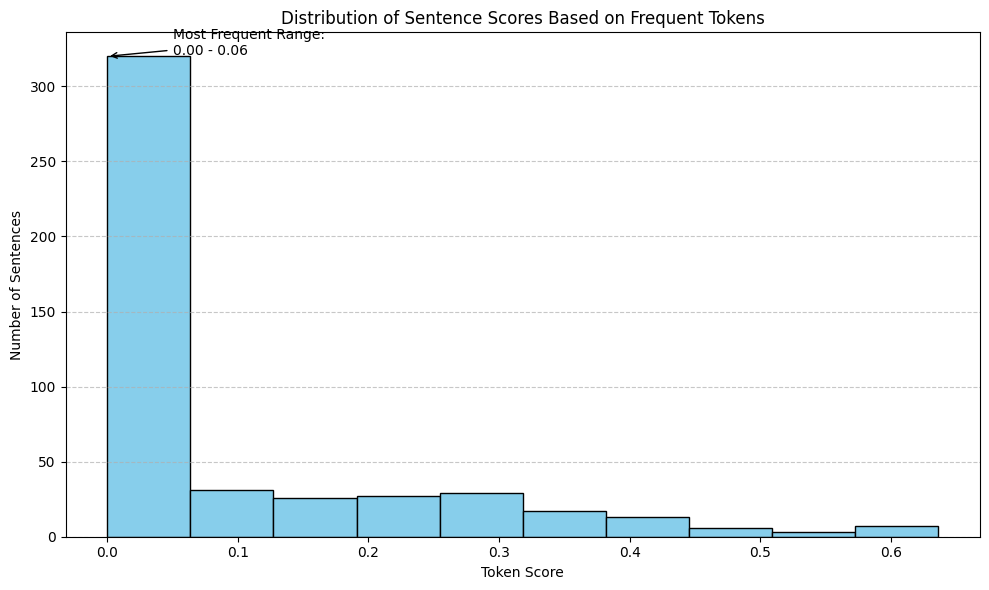

In [28]:
# Reuse frequent_tokens and scoring function
frequent_tokens = ['comment', 'march', '2021', 'says', 'report', 'reply', '22', 'hacks', 'light', 'laser']
sentence_scores = [score_sentence_by_token(sent, frequent_tokens) for sent in sentences]

# Plot histogram with annotation
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(sentence_scores, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Sentence Scores Based on Frequent Tokens")
plt.xlabel("Token Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the most common range
max_bin_index = n.argmax()
plt.annotate(f'Most Frequent Range:\n{bins[max_bin_index]:.2f} - {bins[max_bin_index+1]:.2f}',
             xy=(bins[max_bin_index], n[max_bin_index]),
             xytext=(bins[max_bin_index]+0.05, n[max_bin_index]+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.tight_layout()
plt.show()

# Most common score range appears to be approximately 0.0 to 0.1

#### Section 7. Sentence Lemma Scores Histogram
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)? <br>

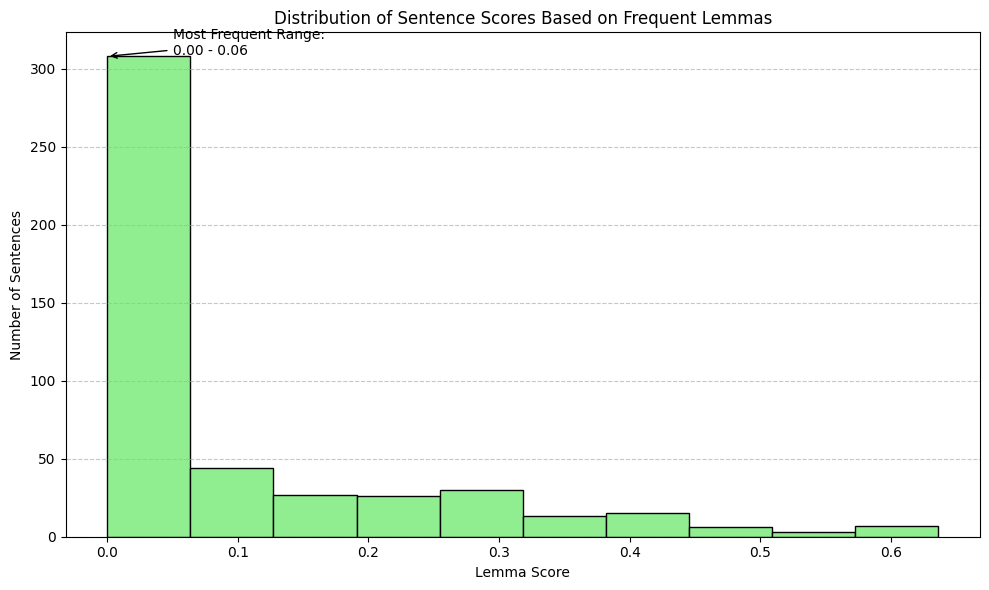

In [29]:
# Reuse frequent_lemmas and scoring function
frequent_lemmas = ['comment', 'say', 'march', '2021', 'report', 'reply', '22', 'hack', 'light', 'laser']
lemma_scores = [score_sentence_by_lemma(sent, frequent_lemmas) for sent in sentences]

# Plot histogram with annotation
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(lemma_scores, bins=10, edgecolor='black', color='lightgreen')
plt.title("Distribution of Sentence Scores Based on Frequent Lemmas")
plt.xlabel("Lemma Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the most common range
max_bin_index = n.argmax()
plt.annotate(f'Most Frequent Range:\n{bins[max_bin_index]:.2f} - {bins[max_bin_index+1]:.2f}',
             xy=(bins[max_bin_index], n[max_bin_index]),
             xytext=(bins[max_bin_index]+0.05, n[max_bin_index]+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.tight_layout()
plt.show()

# Most common score range appears to be approximately 0.0 to 0.1

#### Section 8. 
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it). <br>